# Stock Price Prediction using Machine Learning Algorithm LSTM

In [14]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#            to predict the closing stock price of TESLA using the past 60 day stock price.

In [15]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [16]:
plt.style.use('fivethirtyeight')

In [17]:
# Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2020-12-01')
# show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001
...,...,...,...,...,...,...
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010


In [18]:
#Get the number of rows and columns
df.shape

(1490, 6)

Text(0, 0.5, 'Close Price (USD)')

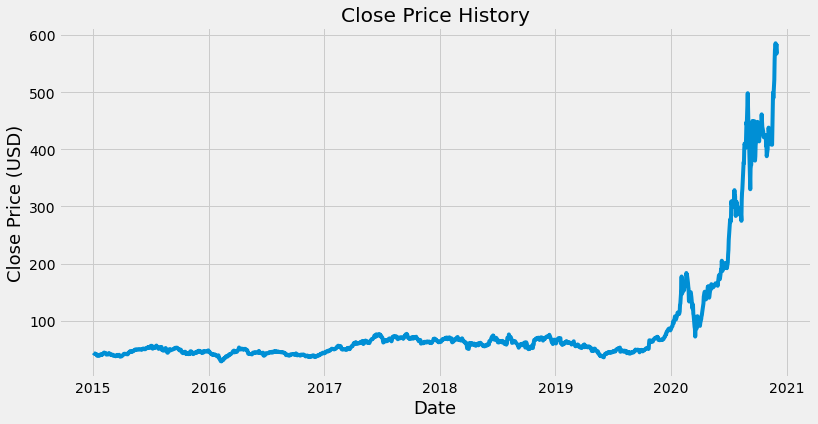

In [19]:
#visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

In [20]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1192

In [21]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02715852],
       [0.02384808],
       [0.02427535],
       ...,
       [1.        ],
       [0.96739823],
       [0.99820475]])

In [22]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.02715852, 0.02384808, 0.02427535, 0.02415686, 0.02403838,
       0.02261654, 0.02101877, 0.02175123, 0.01760061, 0.0173062 ,
       0.01773705, 0.01732774, 0.01899373, 0.02080693, 0.02068844,
       0.02257705, 0.02237238, 0.01999907, 0.02209233, 0.02151785,
       0.02415327, 0.02681742, 0.02688564, 0.02776172, 0.02645837,
       0.02650145, 0.02607419, 0.02482111, 0.02125933, 0.02157889,
       0.02178713, 0.02182663, 0.02442974, 0.02636861, 0.02286069,
       0.02170096, 0.02157529, 0.02280684, 0.02142449, 0.01926661,
       0.02006728, 0.02110135, 0.02045147, 0.01802789, 0.01695073,
       0.01674967, 0.01797762, 0.01701896, 0.01616083, 0.01868135,
       0.01833308, 0.02048019, 0.0186634 , 0.0195359 , 0.02009242,
       0.02084284, 0.01817869, 0.01678198, 0.01483952, 0.01683943])]
[0.01619314393739041]



In [23]:
#Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
#Reshape the dataX_train.shape
X_train.shape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1132, 60, 1)

In [25]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer='sgd', loss='mean_squared_error')
#sgd - stochastic gradient descent
# Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

In [28]:
#Train the model
model.fit(X_train, y_train, batch_size = 1, epochs = 5)
# One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
# Total number of training examples present in a single batch.
# We can’t pass the entire dataset into the neural net at once. So, we divide dataset into Number of Batches or sets or parts.


Epoch 1/5
1132/1132 [==============================] - 18s 16ms/step - loss: 4.2876e-04
Epoch 2/5
1132/1132 [==============================] - 17s 15ms/step - loss: 4.0042e-04
Epoch 3/5
1132/1132 [==============================] - 16s 14ms/step - loss: 3.8566e-04
Epoch 4/5
1132/1132 [==============================] - 18s 16ms/step - loss: 3.6634e-04
Epoch 5/5
1132/1132 [==============================] - 17s 15ms/step - loss: 3.4901e-04


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])    

In [30]:
#Convert the data to a numpy array
X_test = np.array(X_test)


In [31]:
#Reshaoe the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
#Evaluate the model using root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

148.5536931825164

<ipython-input-34-6c6e0146b69c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


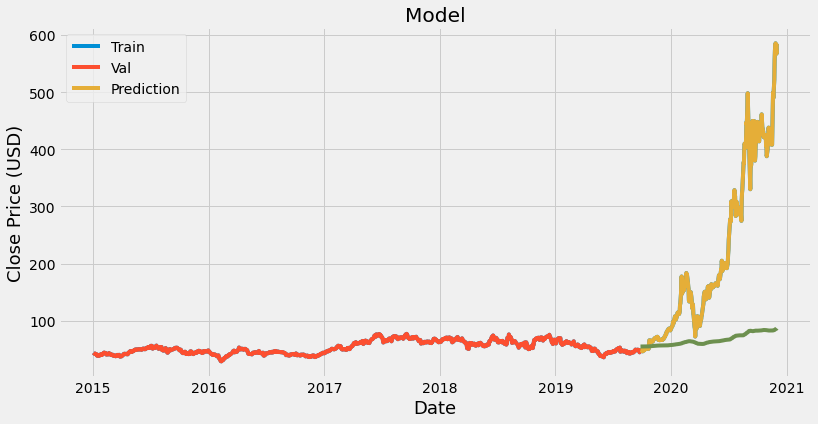

In [34]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'])